# Heat Map of Numerical Integration


In [24]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools


import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl
import pandas as pd
import seaborn as sb
import sklearn as sk
import sklearn.metrics as met


# mpl.style.use('report_style.mplstyle')

In [25]:
ps = np.linspace(0.01, 0.2, 5)
betas = np.linspace(0.05, 1, 5)
run_length = 10**4
qs = [0]
ensemble_size=2
social_structures = ['InVS15']#, 'LyonSchool', 'SFHH', 'Thiers13']
print(ps)

[0.01   0.0575 0.105  0.1525 0.2   ]


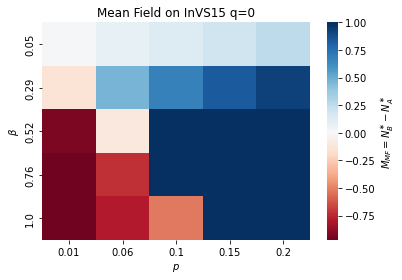

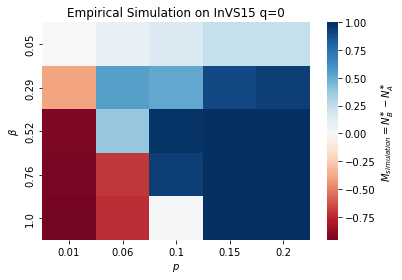

In [3]:

for social_structure in social_structures:
    
    for q in qs:

        fname_A = f'heatmap_int_A_res_{len(betas)}x{len(ps)}_{social_structure}_q={q}_{run_length}'
        data_A = pd.read_csv(f'finished_outputs/{fname_A}.csv', index_col=0)

        fname_B = f'heatmap_int_B_res_{len(betas)}x{len(ps)}_{social_structure}_q={q}_{run_length}'
        data_B = pd.read_csv(f'finished_outputs/{fname_B}.csv', index_col=0)
        
        fname_A_sim = f'heatmap_A_res_{len(betas)}x{len(ps)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_A_sim = pd.read_csv(f'../../../higher order ng (adaptive traveling speaker v2)/finished_outputs/{fname_A_sim}.csv', index_col=0)

        fname_B_sim = f'heatmap_B_res_{len(betas)}x{len(ps)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_B_sim = pd.read_csv(f'../../../higher order ng (adaptive traveling speaker v2)/finished_outputs/{fname_B_sim}.csv', index_col=0)
        
        #print(data_B_sim.head())
        # data_B.drop(columns = ['0.0'], inplace=True)
        # data_A.drop(columns = ['0.0'], inplace=True)
        

        
        colormap = sb.color_palette(palette="RdBu", n_colors=None, desat=None, as_cmap=True)
        sb.heatmap(data_B-data_A, cbar_kws={'label':r'$M_{MF} = N_{B}^{\ast}-N_{A}^{\ast}$'}, cmap=colormap, center=0)
        plt.title(f'Mean Field on {social_structure} q={q}')
        plt.xlabel(r'$p$')
        plt.ylabel(r'$\beta$')
        plt.savefig(f'figures/heatmap_int_res_{len(ps)}x{len(betas)}_{social_structure}_{q}_{run_length}.pdf')
        plt.show()
        
        colormap = sb.color_palette(palette="RdBu", n_colors=None, desat=None, as_cmap=True)
        sb.heatmap(data_B_sim-data_A_sim, cbar_kws={'label':r'$M_{simulation} = N_{B}^{\ast}-N_{A}^{\ast}$'}, cmap=colormap, center=0)
        plt.title(f'Empirical Simulation on {social_structure} q={q}')
        plt.xlabel(r'$p$')
        plt.ylabel(r'$\beta$')
        plt.savefig(f'figures/heatmap_sim_res_{len(ps)}x{len(betas)}_{social_structure}_{q}_{run_length*10}.pdf')
        plt.show()
        
        M_sim = data_B_sim - data_A_sim
        M_MF = data_A - data_B
#         print(M_sim.index.values)
#         print(M_MF.index.values)
        
        
        
        #error = error.abs()
#         colormap = sb.color_palette(palette="RdBu", n_colors=None, desat=None, as_cmap=True)
#         sb.heatmap(error, cbar_kws={'label':r'$|M_{simulation} - M_{MF}|$'}, cmap=colormap, center=0)
#         plt.title(f'{social_structure} q={q}')
#         plt.xlabel('p')
#         plt.ylabel(r'$\beta$')
#         plt.savefig(f'figures/heatmap_error_res_{len(ps)}x{len(betas)}_{social_structure}_{q}_{run_length*10}.pdf')
#         plt.show()

InVS15_0.01_0.05_0.05_q=0_10000
        f_A   f_B          f_AB
0  0.990000  0.01  8.673617e-18
1  0.989947  0.01  5.254296e-05
2  0.989895  0.01  1.052012e-04
3  0.989842  0.01  1.579749e-04
4  0.989789  0.01  2.108644e-04
<class 'list'>
loaded data


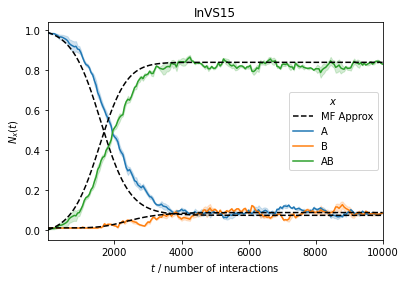

r^2=-0.7418450806750039


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/InVS15_0.0575_0.05_0.05_q=0_10000.csv'

In [27]:
for social_structure in social_structures:
    
    for q in qs:
         for beta in betas:
                for p in ps:
                    fname = f'{social_structure}_{p}_{beta}_{beta}_q={q}_{run_length}'
                    data = pd.read_csv(f'outputs/{fname}.csv', index_col=0)

                    print(fname)
        
                    print(data.head())
       
                    p = round(p,2)
                    plt.figure()
                    plt.plot(data.index.values, data['f_A'], color='black', linestyle='--', zorder=10)
                    plt.plot(data.index.values, data['f_B'], color='black', linestyle='--', zorder=10)
                    plt.plot(data.index.values, data['f_AB'], color='black', linestyle='--', label='MF Approx', zorder=10)
                    plt.legend()
                    #plt.xscale('log')
                    
                    print(type(data['f_A'].to_list()))
                    f_A = data['f_A'].to_list()
                    
                    beta_non_committed = beta
                    beta_committed = beta
                    fname = f'{social_structure}_{p}_{beta_non_committed}_{beta_committed}_q={q}_{run_length}_{ensemble_size}' 

                    data = genfromtxt(f'../../../higher order ng (adaptive traveling speaker v2)/outputs/{fname}.csv', delimiter=',')

                    print('loaded data')

                    A_data = data[0::3,::50]
                    B_data = data[1::3,::50]
                    AB_data = data[2::3,::50]

                    N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

                    A_data = A_data/N
                    B_data = B_data/N
                    AB_data = AB_data/N

                    A_data_av = np.median(A_data, axis=0)
                    A_data_25 = np.percentile(A_data, 25, axis=0)
                    A_data_75 = np.percentile(A_data, 75, axis=0)
                    B_data_av = np.median(B_data, axis=0)
                    B_data_25 = np.percentile(B_data, 25, axis=0)
                    B_data_75 = np.percentile(B_data, 75, axis=0)
                    AB_data_av = np.median(AB_data, axis=0)
                    AB_data_25 = np.percentile(AB_data, 25, axis=0)
                    AB_data_75 = np.percentile(AB_data, 75, axis=0)

                    t = np.linspace(0, run_length, num=(run_length)//50+1, endpoint=True)

                    
                    plt.plot(t[:run_length], A_data_av[:run_length], color='tab:blue', label=r'A')
                    plt.fill_between(t[:run_length], y1=A_data_25[:run_length], y2=A_data_75[:10**5], color='tab:blue', alpha=0.2)
                    plt.plot(t[:run_length], B_data_av[:run_length], color='tab:orange', label=r'B')
                    plt.fill_between(t[:run_length], y1=B_data_25[:run_length], y2=B_data_75[:10**5], color='tab:orange', alpha=0.2)
                    plt.plot(t[:run_length], AB_data_av[:run_length], color='tab:green', label=r'AB')
                    plt.fill_between(t[:run_length], y1=AB_data_25[:run_length], y2=AB_data_75[:10**5], color='tab:green', alpha=0.2)
                    
                    #plt.title(r'$\beta$' + f' = {beta_non_committed} and q={q}')
                    plt.title(social_structure)
                    plt.xlabel('$t$ / number of interactions')
                    plt.ylabel(r'$N_{x}(t)$')
                    plt.legend(title=r'$x$')
                    plt.xlim((10,10**4))
                    plt.savefig(f'Comparison_{fname}_logtime.pdf')
                    plt.show()

                    r2_A = met.r2_score(np.median(data[0::3,:], axis=0)[1:], f_A)

                    print(f'r^2={r2_A}')